# 📰GDP-04. 뉴스 카테고리 다중 분류 - Vocabulary Size를 변경해서 시도해보기


* 이번 시간에는 로이터 뉴스 데이터셋을 가져와 데이터셋을 이해 해 보고, 벡터화 하여 다양한 머신러닝 모델을 사용해 모델의 성능을 비교 해 보는 작업을 해보았습니다.


* 이번 프로젝트에선, 단어의 수에 따라 모델의 성능이 어떻게 변화하는지 테스트 해 봅니다. 


# 루브릭 평가 기준 

| 평가문항 | 상세기준 |
| :---: | --- |
| 1. 분류 모델의 accuracy가 기준 이상 높게 나왔는가? | 3가지 단어 개수에 대해 8가지 머신러닝 기법을 적용하여 그중 최적의 솔루션을 도출하였다. |
| 2. 분류 모델의 F1 score가 기준 이상 높게 나왔는가? | Vocabulary size에 따른 각 머신러닝 모델의 성능변화 추이를 살피고, 해당 머신러닝 알고리즘의 특성에 근거해 원인을 분석하였다. |
| 3. 딥러닝 모델을 활용해 성능이 비교 및 확인되었는가? | 동일한 데이터셋과 전처리 조건으로 딥러닝 모델의 성능과 비교하여 결과에 따른 원인을 분석하였다. |

# 목차 


## 1. 데이터 불러오기 및 필요한 도구 불러오기 
## 2. 로이터 뉴스 데이터 확인하기
## 3. 로이터 뉴스 데이터 전처리
## 4. 다양한 머신 러닝 모델 가져오기
## 5. 모델 학습하기 
## 후기!
## 🖇 참고페이지 

## 시작하기 전에..!


* 구글 드라이브와 마운트 해 줍니다. 
* 예제에서 사용했던 폴더로 경로를 변경 해 주겠습니다.

In [1]:
# 구글 마운트

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

MessageError: ignored

In [ ]:
import os

# 작업 디렉토리를 reuters_classification 으로 변경 
os.chdir('/content/gdrive/MyDrive/AIFFEL/mkdir/reuters_classifiaction')

------------  


# 1. 데이터 불러오기 및 필요한 도구 불러오기 


* 이번 프로젝트에 사용할 모듈과 데이터셋을 불러옵니다.
* num_words 마다 다른 변수명으로 지정 해 주겠습니다. 예제에선 10,000 개의 단어를 시도 해 봤었습니다. 이번 프로젝트에선 빈도수 상위 5000개,15000개, 20000개, 모든 단어 ㅡ 총 4번의 시도를 해 보고, 예제의 결과 값과 비교 해 보겠습니다.

In [2]:
# 필요한 라이브러리 import 
from tensorflow.keras.datasets import reuters # 로이터 데이터셋 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 벡터화 하기 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# 머신러닝 모델 라이브러리 가져오기 
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

# classificatin_report, confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
# 텐서플로우 데이터셋으로 부터 로이터 뉴스 데이터 받아오기
# 빈도수 상위 5000개 
(x5_train, y5_train), (x5_test, y5_test) = reuters.load_data(num_words=5000, test_split=0.2)


2121728/2110848 [==============================] - 0s 0us/step


In [4]:
print('num_words=5000') 
print('훈련 샘플의 수: {}'.format(len(x5_train)))
print('테스트 샘플의 수: {}'.format(len(x5_test)))

num_words=5000
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [5]:
# 빈도수 상위 15000개 
(x15_train, y15_train), (x15_test, y15_test) = reuters.load_data(num_words=15000, test_split=0.2)

In [6]:
print('num_words=15000') 
print('훈련 샘플의 수: {}'.format(len(x15_train)))
print('테스트 샘플의 수: {}'.format(len(x15_test)))

num_words=15000
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [8]:
# 빈도수 상위 20000개 
(x20_train, y20_train), (x20_test, y20_test) = reuters.load_data(num_words=20000, test_split=0.2)


In [9]:
print('num_words=20000') 
print('훈련 샘플의 수: {}'.format(len(x20_train)))
print('테스트 샘플의 수: {}'.format(len(x20_test)))

num_words=20000
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [10]:
# 모든 단어 사용 
(xall_train, yall_train), (xall_test, yall_test) = reuters.load_data(num_words=None, test_split=0.2)


In [11]:
print('num_words=None, 모든 단어 사용하기 ') 
print('훈련 샘플의 수: {}'.format(len(xall_train)))
print('테스트 샘플의 수: {}'.format(len(xall_test)))

num_words=None, 모든 단어 사용하기 
훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


* `num_words=None, test_split=0.2

------------  


# 2. 로이터 뉴스 데이터 확인하기

* 훈련용 데이터의 뉴스와 테스트용 데이터의 뉴스 한줄을 출력 해서 확인 해 봅니다. 
* 데이터는 빈도수 상위 5000개의 데이터를 이용합니다.
* 텐서플로우에서 제공하는 데이터셋은 기본적인 전처리와 정수 인코딩이 되어 제공되기 때문에, 출력값이 정수형으로 출력되는것. 

## &nbsp;&nbsp;2-1. 데이터 내용 확인 해 보기 

In [7]:
print(x5_train[0])
print(x5_test[0])


[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [8]:
#레이블도 출력 해 보겠습니다.
print(y5_train[0])
print(y5_test[0])

3
3


* 레이블은 index 값 처럼 숫자 0부터 시작하기 때문에, 총 레이블의 개수를 확인해 보려면 최댓값에 1을 더해 출력하면 확인 할 수 있다. 
    - ex) 라벨 0 = 시사, 라벨 1 = 사회 ... (어디까지나 예시)


In [9]:
num_classes = max(y5_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


## &nbsp;&nbsp;2-2. 데이터 분포 확인하기 

* 뉴스 기사의 길이 분포를 확인 해 봅니다. 

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


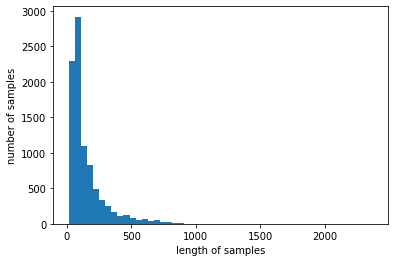

In [10]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x5_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x5_train))/len(x5_train)))

plt.hist([len(s) for s in x5_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

* 맞춰야 하는 클래스 별 데이터 분포도 확인 해 봅니다. 


*  수치적으로도 확인 해 보고, 그래프 시각화를 통해서도 확인 해 봅시다. 

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]
 


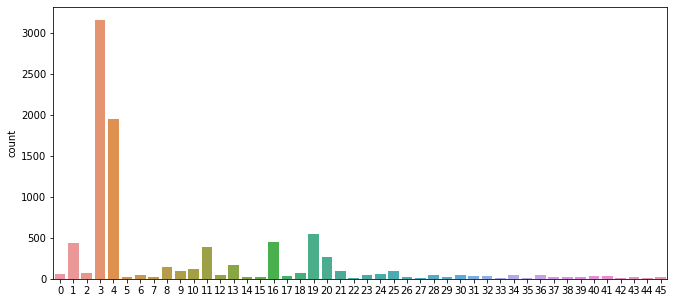

In [11]:
unique_elements, counts_elements = np.unique(y5_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))
print(' ') # 문단 나누기 용 띄어쓰기 
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y5_train)
plt.show()


------------  


# 3. 로이터 뉴스 데이터 전처리

* 텐서플로우 케라스에서 지원하는 로이터 뉴스 데이터는 이미 전처리가 되어있는 상태라, 따로 전처리를 해 줄 필요는 없습니다. 하지만, 처음 출력했을 때도 확인 했듯, 출력값이 정수형 데이터이기 때문에 원본 뉴스 데이터를 확인 할  수 없습니다. 이를 위해 원본 뉴스 데이터로 복원하는 작업을 해 보겠습니다. 또한, 
train data와 test data도 텍스트 데이터로 변환 하겠습니다. 

* 텍스트 데이터를 모델 입력으로 넣기 위해 각 문서를 벡터화 하는 작업이 필요합니다. 머신러닝 방법을 사용할 것이기 때문에, Bag of Words 가설을 기반으로 하는 DTM, TF-IDF 행렬을 이용해 벡터화 해 주겠습니다. 


## &nbsp;&nbsp;3-1. 원본 뉴스 데이터로 복원하기 


- 정수 시퀀스로 변환된 데이터를 ‘굳이’ 다시 텍스트로 돌려보는 작업을 해 봅니다.
- 로이터 뉴스 데이터
    - dictionary data
    - key값 = 단어, value 값 = 고유한 ‘정수’
- `word_index` 로 저장 해 봅니다.



In [12]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('word_index = 뉴스 데이터 단어장 완! 성!')

565248/550378 [==============================] - 0s 0us/step
word_index = 뉴스 데이터 단어장 완! 성!


- word_index에 단어를 입력하면 어떤 정수와 맵핑됬는지 확인 할 수 있습니다.

In [13]:
word_index['apple']

12073

In [14]:
word_index['final']

581

* 사실 위 출력된 정수는 원래 고유한 정수가 아님. 0,1,2 부분에 각각 \<pad>, \<sos>, \<unk> 토큰이 매핑되어있음. 
- 그렇기 때문에, index에 3을 더해주어야 정확한 고유 숫자를 얻을 수 있다. 

In [15]:
# index + 3 
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [16]:
# 확인! 
print(index_to_word[12076])
print(index_to_word[581+3])

apple
final


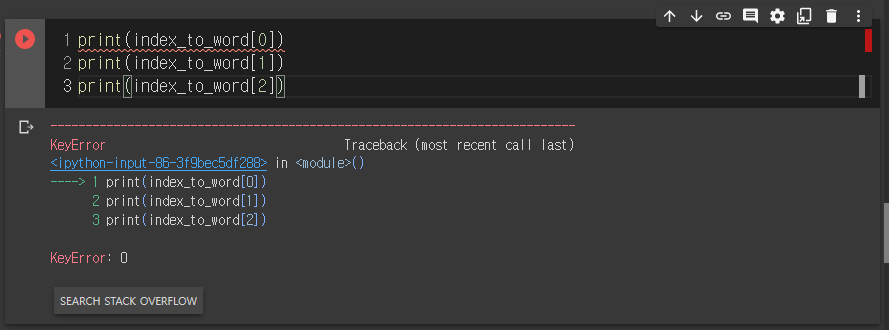
* index에 +3을 함으로써, index 번호가 밀려 0,1,2 번에는 매칭되는 단어가 없어졌다. index_to_word에 0,1,2 값을 넣어 없는것을 확인 할 수 있다.
* 0,1,2 부분엔 각각 \<pad>, \<sos>, \<unk> 를 넣어주겠습니다. 

In [17]:
print(index_to_word[4])

the


In [18]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('wan! ryo!')

wan! ryo!


In [19]:
for i in range(3):
    print('index %d 번째 값 : '%i,index_to_word[i])

index 0 번째 값 :  <pad>
index 1 번째 값 :  <sos>
index 2 번째 값 :  <unk>


* index_to_word를 통해서 첫 번째 훈련용 뉴스 기사를 원래 텍스트로 복원해 봅니다.

In [20]:
print(' '.join([index_to_word[index] for index in x5_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


- 이 데이터 자체도 어느정도 전처리가 되어있기 때문에 자연스럽게 읽히진 않음.
- but 문맥을 가진 텍스트이기 때문에 머신러닝 해도 별 무리는 없을듯
- `<sos>` - 텍스트 분류를 위한 토큰이 아님 = 신경 안써도 됨
- `<unk>` - 는 자연어 처리 전반에서 쓰이는 특별 토큰

## &nbsp;&nbsp;3-2. train, test 텍스트 데이터 변환 

* 우선 상위 5000개의 분포를 쓴 데이터 먼저 변환해 주겠습니다. 
- 다른 경우의 데이터는 시도하면서 함께 바꿔주는걸로.. 

In [21]:
# train data 
decoded = []
for i in range(len(x5_train)):
    t = ' '.join([index_to_word[index] for index in x5_train[i]])
    decoded.append(t)

x5_train = decoded
print(len(x5_train))

8982


In [22]:
#test data
decoded = []
for i in range(len(x5_test)):
    t = ' '.join([index_to_word[index] for index in x5_test[i]])
    decoded.append(t)

x5_test = decoded
print(len(x5_test))

2246


* 제대로 변환되었는지 확인 해 봅니다.

In [23]:
x5_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

In [24]:
x5_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the curr

## &nbsp;&nbsp;3-3. 데이터 벡터화 하기 


*  **DTM** , **TF-IDF** 행렬 을 이용해 벡터화 합니다.
* scikit-learn을 이용해, DTM을 생성합니다.
* 생성한 DTM을 이용해 TF-IDF 행렬을 만듭니다. 
    - 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가집니다.

In [25]:
# DTM 생성하기 
dtmvector = CountVectorizer()
x5_train_dtm = dtmvector.fit_transform(x5_train)
# DTM의 크기 확인! 
print(x5_train_dtm.shape)

(8982, 4867)


In [26]:
# TF-IDF 행렬 만들기
tfidf_transformer = TfidfTransformer()
tfidfv5 = tfidf_transformer.fit_transform(x5_train_dtm)
# TF-IDF 행렬 크기 확인! 
print(tfidfv5.shape)


(8982, 4867)


* test data에도 똑같이 생성 해 줍니다. 

In [27]:
x5_test_dtm = dtmvector.transform(x5_test) #테스트 데이터를 DTM으로 변환
tfidfv5_test = tfidf_transformer.transform(x5_test_dtm) #DTM을 TF-IDF 행렬로 변환

------------  


# 4. 다양한 머신 러닝 모델 가져오기
* 이번 프로젝트에서 사용 할 모델은 총 8종 입니다. 
    - 나이브 베이즈 분류기
    - CNB
    - 로지스틱 회귀
    - 서포트 벡터 머신(SVM)
    - 결정 트리
    - 랜덤 포레스트
    - 그래디언트 부스팅 트리
    - 보팅 

* 한꺼번에 처리 해 주기 위해, 모델 생성 과정을 함수화 처리한 코드를 가져와 활용 해 보겠습니다. 

In [33]:
def train_ml(tfidfv, y_train, tfidfv_test, y_test):
    # 나이브 베이즈 분류기 
    mod = MultinomialNB()
    mod.fit(tfidfv, y_train)
    
    mod_predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("나이브 베이즈 정확도:", accuracy_score(y_test, mod_predicted)) #예측값과 실제값 비교
    
    # CNB
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    
    cb_predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("CNB 정확도:", accuracy_score(y_test, cb_predicted)) #예측값과 실제값 비교
    
    # 로지스틱 회귀 
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)

    lr_predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted)) #예측값과 실제값 비교
    
    # 선형 서포트 벡터 머신 
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    
    lsvc_predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("SVM 정확도:", accuracy_score(y_test, lsvc_predicted)) #예측값과 실제값 비교
    
    # 결정 트리(Decision Tree) 
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    
    tree_predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted)) #예측값과 실제값 비교
    
    # 랜덤 포레스트(Random Forest)
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    
    forest_predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted)) #예측값과 실제값 비교
    
    # 그래디언트 부스팅 트리(GradientBoostingClassifier)
    grbt = GradientBoostingClassifier(random_state=0, verbose=3) # verbose=3
    grbt.fit(tfidfv, y_train)

    grbt_predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted)) #예측값과 실제값 비교
    
    # 보팅(Voting)
    voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
        ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)
    
    voting_classifier_predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
    print("보팅 정확도:", accuracy_score(y_test, voting_classifier_predicted)) #예측값과 실제값 비교
    
    return mod, cb, lr, lsvc, tree, forest, grbt, voting_classifier

------------  


# 5. 모델 학습하기 


* 4에서 만든 함수를 이용해 빈도수 상위 5000개의 단어분포 데이터를 학습시켜주겠습니다. 

In [34]:
mod, cb, lr, lsvc, tree, forest, grbt, voting_classifier = train_ml(tfidfv5, y5_train, tfidfv5_test, y5_test)

나이브 베이즈 정확도: 0.6731967943009796
CNB 정확도: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8058771148708815


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVM 정확도: 0.7702582368655387
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.701246660730187
      Iter       Train Loss   Remaining Time 
         1           1.4697           15.83m
         2     2131099.0239           15.86m
         3 113352934366748750033493137947714414201794552363528671409179356940992512.0000           15.76m
         4 645005367195105573487290209089081189090170195029150070319832395667206596719018218881024.0000           15.77m
         5 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           15.62m
         6 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           15.45m
         7 443067299530301659980374363525949995629695549691559890285869350923592723545213280554158712204202745088665306932510573934053386280801140736.0000           15.28m
         8 443067299530301659980

------------  




#6. 다양한 시도 해 보기

* 빈도수 상위 15,000개, 20,000개, 모든 단어를 사용해 모델을 학습시켜보겠습니다. 

## &nbsp;&nbsp;6-1. 빈도수 상위 15,000개 의 경우 

* x15_train , y15_train


* **train, test 데이터 변환** 

In [35]:
# train data 
decoded = []
for i in range(len(x15_train)):
    t = ' '.join([index_to_word[index] for index in x15_train[i]])
    decoded.append(t)

x15_train = decoded
print(len(x15_train))

8982


In [36]:
#test data
decoded = []
for i in range(len(x15_test)):
    t = ' '.join([index_to_word[index] for index in x15_test[i]])
    decoded.append(t)

x15_test = decoded
print(len(x15_test))

2246


* **행렬변환** 

In [37]:
# DTM 생성하기 
dtmvector = CountVectorizer()
x15_train_dtm = dtmvector.fit_transform(x15_train)
x15_test_dtm = dtmvector.transform(x15_test) #테스트 데이터를 DTM으로 변환
# DTM의 크기 확인! 
print(x15_train_dtm.shape)
print(x15_test_dtm.shape)

(8982, 14227)
(2246, 14227)


In [38]:
# TF-IDF 행렬 만들기
tfidf_transformer = TfidfTransformer()
tfidfv15 = tfidf_transformer.fit_transform(x15_train_dtm)
tfidfv15_test = tfidf_transformer.transform(x15_test_dtm) #DTM을 TF-IDF 행렬로 변환
# TF-IDF 행렬 크기 확인! 
print(tfidfv15.shape)
print(tfidfv15_test.shape)

(8982, 14227)
(2246, 14227)


In [39]:
# 모델 학습 
mod15, cb15, lr15, lsvc15, tree15, forest15, grbt15, voting_classifier15 = train_ml(tfidfv15, y15_train, tfidfv15_test, y15_test)

나이브 베이즈 정확도: 0.6331255565449688
CNB 정확도: 0.7720391807658059


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8125556544968834


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVM 정확도: 0.7791629563668745
결정 트리 정확도: 0.6193232413178985
랜덤 포레스트 정확도: 0.6714158504007124
      Iter       Train Loss   Remaining Time 
         1           1.4326           17.38m
         2       81331.2398           17.37m
         3     5836811.5076           17.22m
         4 63789339395313685793847548538268197034083221504000.0000           17.08m
         5 196168839837262027401908577577888497468749556189708834227594295318514495389696.0000           16.98m
         6 195923785634665546449869624710654194514209248812873904757767900848230842770539944000396265808857873033572436963932241920.0000           16.81m
         7 195923785634665546449869624710654194514209248812873904757767900848230842770539944000396265808857873033572436963932241920.0000           16.67m
         8 195923785634665546449869624710654194514209248812873904757767900848230842770539944000396265808857873033572436963932241920.0000           16.51m
         9 195923785634665546449869624710654194514209248812873904757767

## &nbsp;&nbsp;6-2. 빈도수 상위 20,000개 의 경우 

* x20_train , y20_train


* **train, test 데이터 변환** 

In [40]:
# train data 
decoded = []
for i in range(len(x20_train)):
    t = ' '.join([index_to_word[index] for index in x20_train[i]])
    decoded.append(t)

x20_train = decoded
print(len(x20_train))

8982


In [41]:
#test data
decoded = []
for i in range(len(x20_test)):
    t = ' '.join([index_to_word[index] for index in x20_test[i]])
    decoded.append(t)

x20_test = decoded
print(len(x20_test))

2246


* **행렬변환** 

In [42]:
# DTM 생성하기 
dtmvector = CountVectorizer()
x20_train_dtm = dtmvector.fit_transform(x20_train)
x20_test_dtm = dtmvector.transform(x20_test) #테스트 데이터를 DTM으로 변환
# DTM의 크기 확인! 
print(x20_train_dtm.shape)
print(x20_test_dtm.shape)

(8982, 18479)
(2246, 18479)


In [43]:
# TF-IDF 행렬 만들기
tfidf_transformer = TfidfTransformer()
tfidfv20 = tfidf_transformer.fit_transform(x20_train_dtm)
tfidfv20_test = tfidf_transformer.transform(x20_test_dtm) #DTM을 TF-IDF 행렬로 변환
# TF-IDF 행렬 크기 확인! 
print(tfidfv20.shape) 
print(tfidfv20_test.shape)

(8982, 18479)
(2246, 18479)


In [44]:
# 모델 학습 
mod20, cb20, lr20, lsvc20, tree20, forest20, grbt20, voting_classifier20 = train_ml(tfidfv20, y20_train, tfidfv20_test, y20_test)

나이브 베이즈 정확도: 0.6193232413178985
CNB 정확도: 0.7671415850400712


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8098842386464826


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVM 정확도: 0.7818343722172751
결정 트리 정확도: 0.6211041852181657
랜덤 포레스트 정확도: 0.6714158504007124
      Iter       Train Loss   Remaining Time 
         1           1.4325           17.89m
         2       95425.3579           17.89m
         3      105570.6041           17.68m
         4 593224062708261760.0000           17.51m
         5 3774435173865725234928276254753926961504996704196152337310417818266040513071397885183910310310561420723401279705159106767064399872.0000           17.35m
         6 3774435173865725234928276254753926961504996704196152337310417818266040513071397885183910310310561420723401279705159106767064399872.0000           17.17m
         7 1489548745818530758244232012042654711502171239857813292906777294351633452202689035463067802524827847410009904379930627599745172362994401857765376.0000           17.00m
         8 1489548745818530758244232012042654711502171239857813292906777294351633452202689035463067802524827847410009904379930627599745172362994401857765376.0000         

## &nbsp;&nbsp;6-3. 모든 단어를 사용했을 경우 

* xall_train , yall_train


* **train, test 데이터 변환** 

In [45]:
# train data 
decoded = []
for i in range(len(xall_train)):
    t = ' '.join([index_to_word[index] for index in xall_train[i]])
    decoded.append(t)

xall_train = decoded
print(len(xall_train))

8982


In [46]:
#test data
decoded = []
for i in range(len(xall_test)):
    t = ' '.join([index_to_word[index] for index in xall_test[i]])
    decoded.append(t)

xall_test = decoded
print(len(xall_test))

2246


* **행렬변환** 

In [47]:
# DTM 생성하기 
dtmvector = CountVectorizer()
xall_train_dtm = dtmvector.fit_transform(xall_train)
xall_test_dtm = dtmvector.transform(xall_test) #테스트 데이터를 DTM으로 변환
# DTM의 크기 확인! 
print(xall_train_dtm.shape)
print(xall_test_dtm.shape)

(8982, 26506)
(2246, 26506)


In [48]:
# TF-IDF 행렬 만들기
tfidf_transformer = TfidfTransformer()
tfidfvall = tfidf_transformer.fit_transform(xall_train_dtm)
tfidfvall_test = tfidf_transformer.transform(xall_test_dtm) #DTM을 TF-IDF 행렬로 변환
# TF-IDF 행렬 크기 확인! 
print(tfidfvall.shape)
print(tfidfvall_test.shape)

(8982, 26506)
(2246, 26506)


In [49]:
# 모델 학습 
modall, cball, lrall, lsvcall, treeall, forestall, grbtall, voting_classifierall = train_ml(tfidfv20, y20_train, tfidfv20_test, y20_test)

나이브 베이즈 정확도: 0.6193232413178985
CNB 정확도: 0.7671415850400712


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8098842386464826


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SVM 정확도: 0.7742653606411398
결정 트리 정확도: 0.6211041852181657
랜덤 포레스트 정확도: 0.6714158504007124
      Iter       Train Loss   Remaining Time 
         1           1.4325           17.23m
         2       95425.3579           17.28m
         3      105570.6041           17.16m
         4 593224062708261760.0000           17.01m
         5 3774435173865725234928276254753926961504996704196152337310417818266040513071397885183910310310561420723401279705159106767064399872.0000           16.84m
         6 3774435173865725234928276254753926961504996704196152337310417818266040513071397885183910310310561420723401279705159106767064399872.0000           16.66m
         7 1489548745818530758244232012042654711502171239857813292906777294351633452202689035463067802524827847410009904379930627599745172362994401857765376.0000           16.50m
         8 1489548745818530758244232012042654711502171239857813292906777294351633452202689035463067802524827847410009904379930627599745172362994401857765376.0000         

## &nbsp;&nbsp;6-4 모델 학습 결과 비교

* 모델 학습 결과를 비교해 보겠습니다! 

* 나이브 베이즈 분류기 


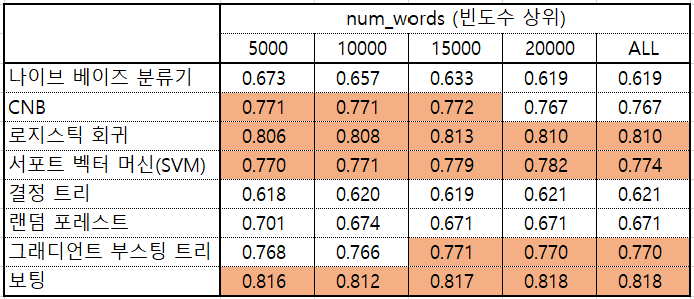

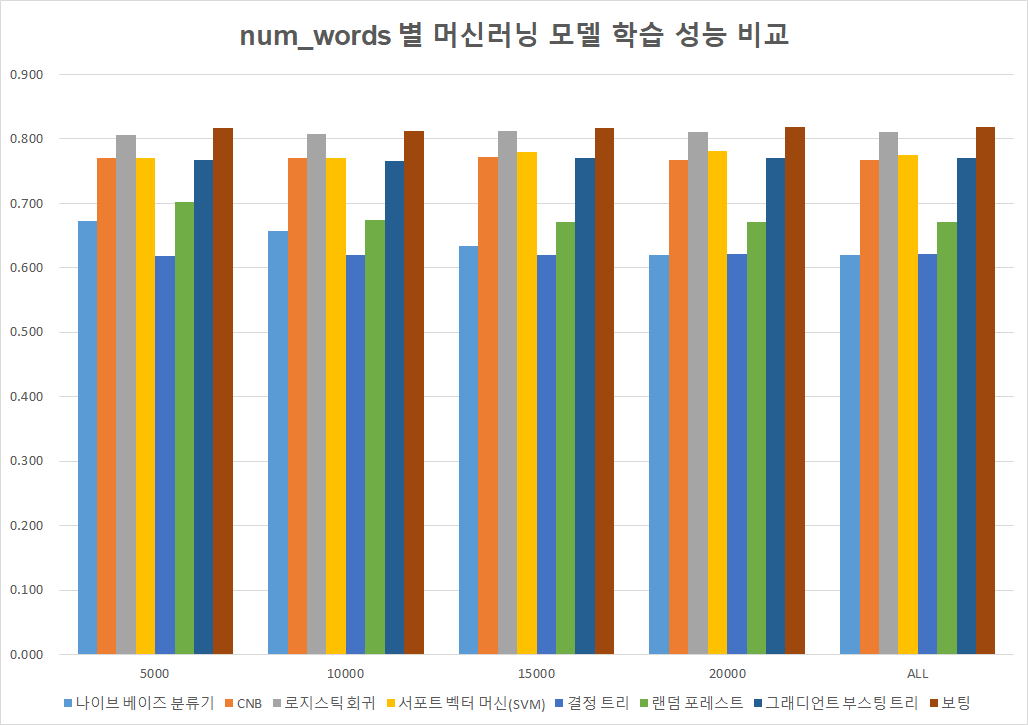

In [1]:
bayse = [0.673196794300979, 0.656723063223508, 0.633125556544968, 0.619323241317898, 0.619323241317898]
cnb = [0.770703472840605, 0.770703472840605, 0.772039180765805, 0.767141585040071, 0.767141585040071]
logistic = [0.805877114870881, 0.807658058771148, 0.812555654496883, 0.809884238646482, 0.809884238646482]
svm = [0.764915405164737, 0.770703472840605, 0.776046304541407, 0.774265360641139, 0.784505788067675]
tree = [0.617987533392698, 0.620213713268032, 0.619323241317898, 0.621104185218165, 0.621104185218165]
rf = [0.701246660730187, 0.674087266251113, 0.671415850400712, 0.671415850400712, 0.671415850400712]
gbs = [0.767586821015138, 0.766251113089937, 0.770703472840605, 0.770258236865538, 0.770258236865538]
voting = [0.816117542297417, 0.811665182546749, 0.816562778272484, 0.817898486197684, 0.817898486197684]

vocab_size_list = ['5', '10', '15', '20', 'all']
model_list = [bayse, cnb, logistic, svm, tree, rf, gbs, voting]

In [2]:
acc_dict = {}
for idx, vs in enumerate(vocab_size_list):
    acc_list = []
    for model in model_list:
        acc_list.append(model[idx])
    acc_dict[vs] = sum(acc_list)/len(model_list)

In [3]:
acc_dict

{'10': 0.7347506678539621,
 '15': 0.7339715048975952,
 '20': 0.7314113980409611,
 '5': 0.7397039180765803,
 'all': 0.7326914514692782}

* 각 모델의 정확도 확인 결과, 5000개의 단어 개수가 가장 정확도가 높았음을 알 수 있었다. 


## &nbsp;&nbsp;6-5. 딥러닝 모델학습 

* 머신러닝 모델을 사용해 봤으니, 딥러닝 모델도 활용 해 봅시다. LSTM 모델을 이용합니다. 
*  가장 정확도가 높았던 상귀 5000개의 단어 분포를 vocab_size 로 정해 딥러닝 모델을 학습시켜주겠습니다. 

In [28]:
from tensorflow import keras

vocab_size = 5000
word_vector_dim = 32  

model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, word_vector_dim))
model_LSTM.add(keras.layers.LSTM(32))
# model_LSTM.add(keras.layers.Dense(128, activation='relu'))  
model_LSTM.add(keras.layers.Dense(num_classes, activation='softmax'))  

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          160000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 46)                1518      
                                                                 
Total params: 169,838
Trainable params: 169,838
Non-trainable params: 0
_________________________________________________________________


In [29]:
tfidfv5.shape, y5_train.shape

((8982, 4867), (8982,))

### 학습 데이터 실험
- 캐글 데이터 LSTM 딥러닝 모델 학습 방법을 가져와 시도 해 봤습니다. 
- sparse한 행렬을 dense하게 만들기 위해 두가지 변환으로 실험합니다. 
    1. toarray() : array로 변환(에러메세지에서 추천하는 방법)
    2. todense() : Return a dense matrix representation of this matrix.

* [toarray, todense - SciPy 압축 희소 열 행렬](https://rfriend.tistory.com/551)

In [30]:
tfidfv5_arr = tfidfv5.toarray()
tfidfv5_dense = tfidfv5.todense()

In [31]:
tfidfv5_test_arr = tfidfv5_test.toarray()
tfidfv5_test_dense = tfidfv5_test.todense()

In [32]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

model_LSTM.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            
epochs=20
batch_size=64


history_LSTM = model_LSTM.fit(tfidfv5_arr,
                                y5_train,
                                epochs=epochs,
                                batch_size=batch_size,
                                callbacks=[es],
                                validation_split=0.2,
                                verbose=1)

Epoch 1/20
113/113 [==============================] - 26s 176ms/step - loss: 2.7703 - accuracy: 0.3482 - val_loss: 2.4111 - val_accuracy: 0.3450
Epoch 2/20
113/113 [==============================] - 19s 173ms/step - loss: 2.4096 - accuracy: 0.3534 - val_loss: 2.4068 - val_accuracy: 0.3450
Epoch 3/20
113/113 [==============================] - 21s 185ms/step - loss: 2.4064 - accuracy: 0.3534 - val_loss: 2.4055 - val_accuracy: 0.3450
Epoch 4/20
113/113 [==============================] - 20s 175ms/step - loss: 2.4072 - accuracy: 0.3534 - val_loss: 2.4064 - val_accuracy: 0.3450
Epoch 5/20
113/113 [==============================] - 20s 174ms/step - loss: 2.4064 - accuracy: 0.3534 - val_loss: 2.4060 - val_accuracy: 0.3450
Epoch 6/20
113/113 [==============================] - 20s 173ms/step - loss: 2.4071 - accuracy: 0.3534 - val_loss: 2.4076 - val_accuracy: 0.3450
Epoch 7/20
113/113 [==============================] - 19s 173ms/step - loss: 2.4063 - accuracy: 0.3534 - val_loss: 2.4046 - val_ac

In [33]:
results = model_LSTM.evaluate(tfidfv5_test_arr,  y5_test, verbose=2)
print(results)

71/71 - 4s - loss: 2.4191 - accuracy: 0.3620 - 4s/epoch - 63ms/step
[2.4191091060638428, 0.36197686195373535]


In [34]:
from tensorflow import keras

vocab_size = 5000
word_vector_dim = 32  

model_LSTM_dense = keras.Sequential()
model_LSTM_dense.add(keras.layers.Embedding(vocab_size, 
                                 word_vector_dim))
model_LSTM_dense.add(keras.layers.LSTM(32))
# model_LSTM_dense.add(keras.layers.Dense(128, activation='relu'))  
model_LSTM_dense.add(keras.layers.Dense(num_classes, activation='softmax'))  

model_LSTM_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          160000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 46)                1518      
                                                                 
Total params: 169,838
Trainable params: 169,838
Non-trainable params: 0
_________________________________________________________________


In [35]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

model_LSTM_dense.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
            
epochs=20
batch_size=64

history_LSTM_dense = model_LSTM_dense.fit(tfidfv5_dense,
                                y5_train,
                                epochs=epochs,
                                batch_size=batch_size,
                                callbacks=[es],
                                validation_split=0.2,
                                verbose=1)

Epoch 1/20
113/113 [==============================] - 21s 178ms/step - loss: 2.7623 - accuracy: 0.3137 - val_loss: 2.4082 - val_accuracy: 0.3450
Epoch 2/20
113/113 [==============================] - 20s 176ms/step - loss: 2.4107 - accuracy: 0.3534 - val_loss: 2.4044 - val_accuracy: 0.3450
Epoch 3/20
113/113 [==============================] - 20s 177ms/step - loss: 2.4070 - accuracy: 0.3534 - val_loss: 2.4077 - val_accuracy: 0.3450
Epoch 4/20
113/113 [==============================] - 20s 175ms/step - loss: 2.4063 - accuracy: 0.3534 - val_loss: 2.4073 - val_accuracy: 0.3450
Epoch 5/20
113/113 [==============================] - 20s 175ms/step - loss: 2.4061 - accuracy: 0.3534 - val_loss: 2.4088 - val_accuracy: 0.3450
Epoch 6/20
113/113 [==============================] - 20s 176ms/step - loss: 2.4054 - accuracy: 0.3534 - val_loss: 2.4062 - val_accuracy: 0.3450
Epoch 6: early stopping


In [36]:
results_dense = model_LSTM_dense.evaluate(tfidfv5_test_dense,  y5_test, verbose=2)
print(results_dense)

71/71 - 5s - loss: 2.4179 - accuracy: 0.3620 - 5s/epoch - 64ms/step
[2.417923927307129, 0.36197686195373535]


* toarray() : array로 변환(에러메세지에서 추천하는 방법) -> [2.4191091060638428, 0.36197686195373535]
* todense() : Return a dense matrix representation of this matrix.
    -> [2.417923927307129, 0.36197686195373535]

* 두 방법의 결과값은 그렇게 큰 차이는 없었다. 

----  


# 후기!

## 함수화의 안좋은 점을 깨달았다.
* 다양한 시도를 한줄의 코드 만으로 실행 시켜 줄 수 있었던 함수화. 스크롤 압박을 줄이고, 보기 쉬운 문서를 만들고 싶단 생각에, 캐글 스터디때 필사했던 프로젝트를 참고해서 프로젝트를 진행하였다.정말, 한줄에 8개의 머신러닝 모델의 결과값이 출력되니 학습과 출력에 시간은 오래 걸렸지만, 확실히 편했다.   
- 하지만 이때문에 Confusion Matrix 와 classification_report 를 활용할 수 없어 모델의 정확한 성능을 알 수 없었다. 그저 나온 결과 값 만으로만 머신러닝 모델의 성능을 파악했었는데, 시각화나, classification_report 가 없으니 모델 학습이 잘 되었는가에 대한 확신이 서질 않았다. 
- 이후 진행하는 노드는, 다양한 시도용 노트북과 제출용 노트북을 나눠서 가장 좋았던 시도 하나만 가져와 시각화 해보는 식으로 해봐야겠다.


## 데이터 변환, 함수화 하고 싶었어.. 
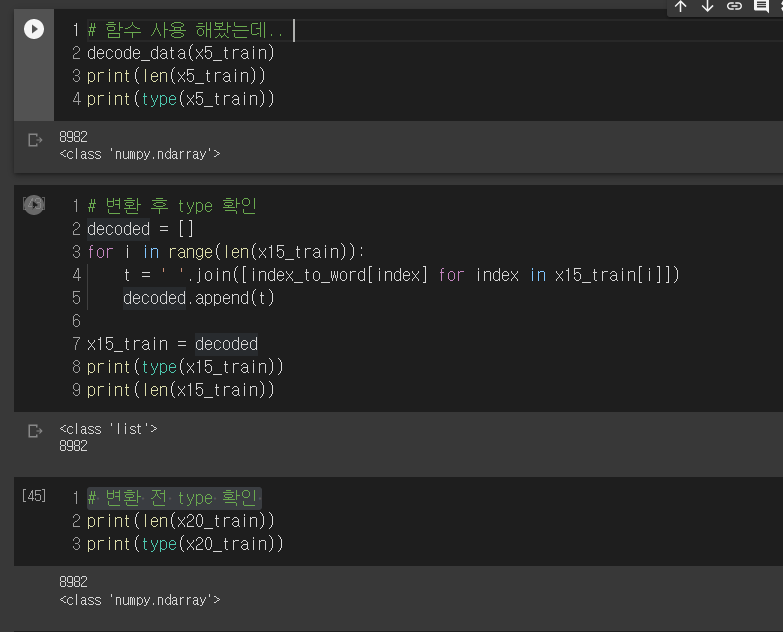

* train, test를 변환해 주는 과정에서, 이 부분도 똑같이 반복하니 함수화 해 주면 더 편하지 않을까싶어, 함수화를 시도 했었었다. 
* 하지만 출력값이 텍스트형이 아닌 정수형으로 출력되었고, type도 `list` 가 아닌, `numpy.ndarray`  타입으로 출력되었다. 이를 통해 함수로 return 된 값은 원본 데이터를 변경시키지 않는단 사실을 알게되었고, 시도했던것을 지우고 그대로 똑같은 코드를 반복하는 식으로 진행했었다. 
* 거의 다 했을 때 쯤, exp11에서 시도했던 함수화 과정이 떠올랐고, 그때도 전처리된 데이터가 출력되지 않아 어려움을 겪었던 문제가 있었다. 변수명으로 함수를 선언하는 것으로 해결했었는데, 그렇게 했더라면 정수->텍스트 변환 함수가 완성됬을 수도 있었겠단 생각이 들었다. 다음 노드땐 꼭 해봐야지.. 

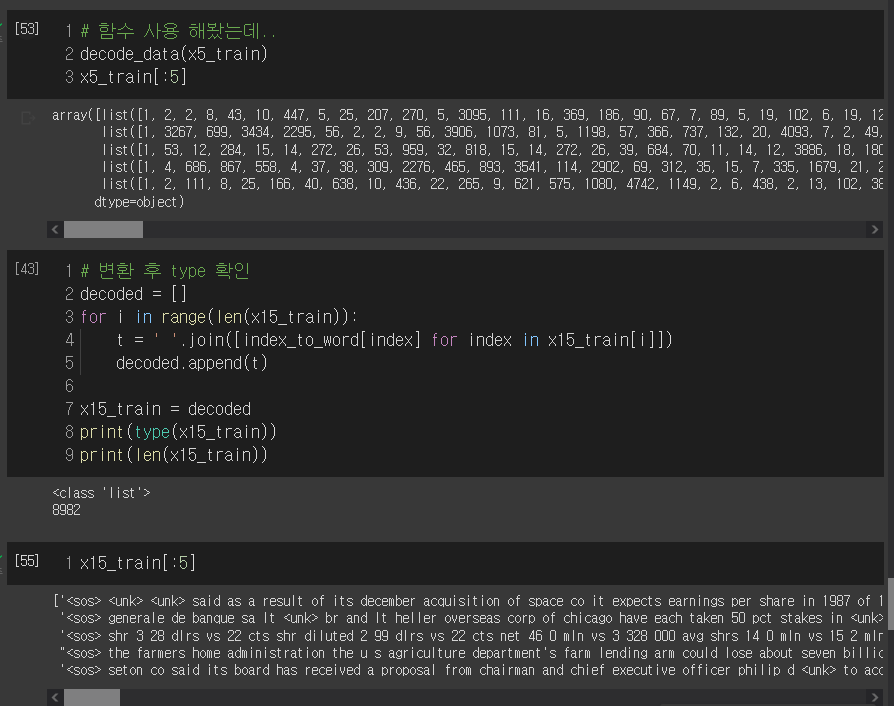

## 배워야할 게 많다 어서 움직이자.. 
* 응용이 힘들어 다른 분의 코드를 참고하는건 좋지만, 이해를 못 하고 넘어가니 이 부분의 이 메소드를 왜 사용하는지, 무슨 의도로 사용하신 건지를 모르겠다.  
* 하나하나 내가 코드를 쳐봐야하고, 모델과 시각화 툴에 대해 알고 있어야 효율적인 모델을 구축하고 응용할 수 있단 사실을 뼈저리게 느낀 노드였다. 
* 기간으론 얼마 남지 않았지만, 그래도 앞으로 진행해야할 프로젝트와 노드가 많이 남았으니 열심히 공부해야지🙂 
- 또한, 모델 학습후에 누가 보더라도 ‘잘 학습됬구나!’ 하고 느낄 수 있을 만큼 시각화나 학습에 대한 결과물도 보기 좋게 출력 할 수 있게 노력해야지. 
정말정말 맘에 안든다..

-----  


# 🖇 참고페이지 

## 머신러닝 모델 가져오기 함수화
* [고마워요 캐글 스터디!](https://github.com/miinkang/AI_Project_AIFFEL/blob/main/[GD-04]TFIDF_vectorization.ipynb)